<a href="https://colab.research.google.com/github/tkeshun/til/blob/master/Audio_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
a = [[0 for j in range(3)] for i in range(5)]
print(a)
a[0][0] = 1
print(a)

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
[[1, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]


In [ ]:
a = [[0 for j in range(3)] for i in range(2)]
print(a)
# [[0, 0, 0], [0, 0, 0]]

a[0][0] = 1
print(a)

[[0, 0, 0], [0, 0, 0]]
[[1, 0, 0], [0, 0, 0]]


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
import sys
sys.path.append('/content/gdrive/My Drive/search/Wave-U-net/Wave-U-Net/')
os.chdir('/content/gdrive/My Drive/search/Wave-U-net/Wave-U-Net/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#pythonによるwavファイルの入出力

In [ ]:
#ライブラリのimport
import numpy as np #計算
import sys #コマンドライン引数
import wave #音声

In [ ]:
#ファイルの読み込み
#args = sys.argv
inFilename = args[1] # args[0]:ソースファイル名,args[1] 引数1
fIn = wave.open(inFilename,'rb')

#パラメータ読み込み
ch = fIn.getnchannels() #チャンネル(モノラルorステレオ)
fs = fIn.getframerate() #サンプリング周波数
nbits = fIn.getsampwidth() #量子化bit数
L = fIn.getnframes()#サンプル数

In [ ]:
#音源の再生
#http://bfin.sakura.ne.jp/?p=1090
import numpy as np
import IPython.display as ipd

fs = 480000    #サンプル周波数
duration = 3.0 #再生秒数

#信号を生成して出力
def play_sine(f):
  t = np.linspace(0.,duration,int(fs*duration),endpoint=False) # start,stop,num of data
  x = np.sin(f*(2. * np.pi) * 440 *t)
  IP.display.display(IP.display.Audio(x, rate=fs, autoplay=True))
  #IP.display.display(IP.display.Audio(x, rate=fs,autoplay=True))

In [ ]:
def play_sine(f):
    t = np.linspace(0., duration, int(fs * duration))  # ( start, stop, num of data )
    x = np.sin(f * (2. * np.pi) * t)
    IP.display.display(IP.display.Audio(x, rate=fs, autoplay=True))
    #IP.display.HTML(IP.display.Audio(x, rate=fs, autoplay=True))

In [ ]:
play_sine(440.0)

In [ ]:
#http://bfin.sakura.ne.jp/?p=1090
import numpy as np
import IPython.display as ipd

fs = 48000    #サンプル周波数高すぎると音声が生成されない
duration = 3.0 #再生秒数

#信号を生成して出力
def play_sine(f):
  f = 440
  t = np.linspace(0.,duration,int(fs*duration),endpoint=False) # start,stop,num of data
  x = np.sin(f*(2. * np.pi) *t)
  IP.display.display(IP.display.Audio(x, rate=fs,autoplay=True))

In [ ]:
play_sine(440)

In [ ]:
import numpy
import IPython.display as ipd
sr = 380000 # sample rate
T = 3.0    # seconds
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*440*t)                # pure sine wave at 440 Hz
ipd.Audio(x, rate=sr) # load a NumPy array

In [ ]:
%matplotlib inline

In [ ]:
window = 1024
hop = 768
left = 0
cnt = 0
while left <= 8192:
  cnt+=1
  left+=hop

print(cnt)

11


#librosa チュートリアル


In [ ]:
#librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
print(librosa.__version__)

0.6.3


#ルール

- すべてのデータは基本的なnumpy型
- オーディオバッファは y とする。
- サンプリングレートを sr とする
最後の軸は時間的に

```
y[1000] is the 1001st sample
S[:, 100] is the 101st frame of S
```

- Defaultsではsr=22050, hop_length=512

#チュートリアルのロードマップ

- librosa.core
- librosa.feature
- librosa.display
- librosa.beat
- librosa.segment
- librosa.decompose




In [ ]:
#audio buffer y, サンプリングレート(サンプリング周波数) sr
y ,sr = librosa.load(librosa.util.example_audio_file())

In [ ]:
ipd.Audio(librosa.util.example_audio_file())
print(len(y),sr)

1355168 22050


##librosa.core

低レベルのオーディオプロセス
単位変換
時間周波数表現

In [ ]:
#シグナルをネイティブサンプリングレートでロードするには sr=None を使用します。
y_orig, sr_orig = librosa.load(librosa.util.example_audio_file(),sr=None)
print(len(y_orig), sr_orig)

2710336 44100


In [ ]:
#Resampling is easy
sr = 22050
y = librosa.resample(y_orig, sr_orig, sr)
print(len(y), sr)

1355168 22050


In [ ]:
#でもそれって秒単位で何なんだ？
print(librosa.samples_to_time(len(y), sr))

61.45886621315193


##Spectral representations(スペクトル表現)

短時間フーリエ変換はほとんどの解析の基礎となります。
librosa.stft は複素行列 D を返します。
`D[f,t]` はFFTの値でf が周波数，ｔが時刻(frame)を表す
周波数の振幅と位相を表わす実数と虚数のペアを周波数ビンという 

In [ ]:
D = librosa.stft(y)
print(D.shape, D.dtype)

(1025, 2647) complex64


多くの場合、我々はマグニチュードだけを気にしています。
Dには振幅Sと位相Fの両方が含まれている

In [ ]:
import numpy as np
S, phase = librosa.magphase(D)

In [ ]:
print(S.dtype,phase.dtype,np.allclose(D,S*phase))

float32 complex64 True


#librosa.display
スペクトルと波形のプロットルーチン

In [ ]:
#Displays are built with matplotlib 
import matplotlib.pyplot as plt
#プロットをきれいにしよう
import matplotlib.style as ms
ms.use('seaborn-muted')

#ノートブックで図形をインタラクティブにレンダリング
%matplotlib nbagg
# IPythonは再生用のオーディオウィジェットを提供してくれます。
#from IPython.display import Audio#使うときはコメントアウトはずす


##Waveform display


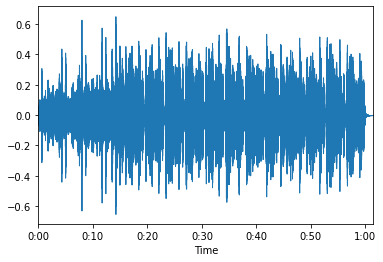

In [ ]:
plt.figure()
librosa.display.waveplot(y=y, sr=sr)

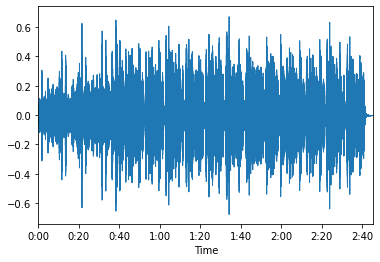

In [ ]:
plt.figure()
librosa.display.waveplot(y=y, sr=8192)

##ためし

503472 8192


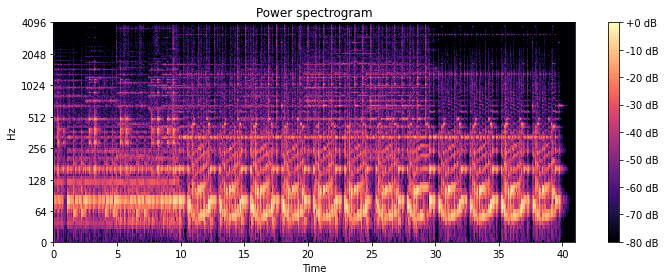

In [ ]:
#audio buffer y, サンプリングレート(サンプリング周波数) sr
#y ,sr = librosa.load(librosa.util.example_audio_file())
sr = 8192
y = librosa.resample(y_orig, sr_orig, sr)
D = np.abs(librosa.stft(y,n_fft = 1024,hop_length=768,  window='hann'))
print(len(y), sr)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

503472 8192


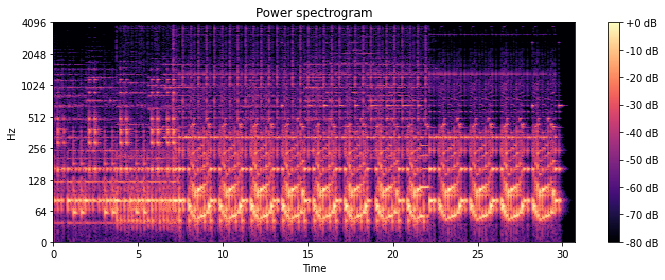

In [ ]:
sr = 8192
y = librosa.resample(y_orig, sr_orig, sr)
D = np.abs(librosa.stft(y,n_fft = 1024*4))
print(len(y), sr)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()